In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('boston.csv') #reading of the csv file 
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

## visulization 

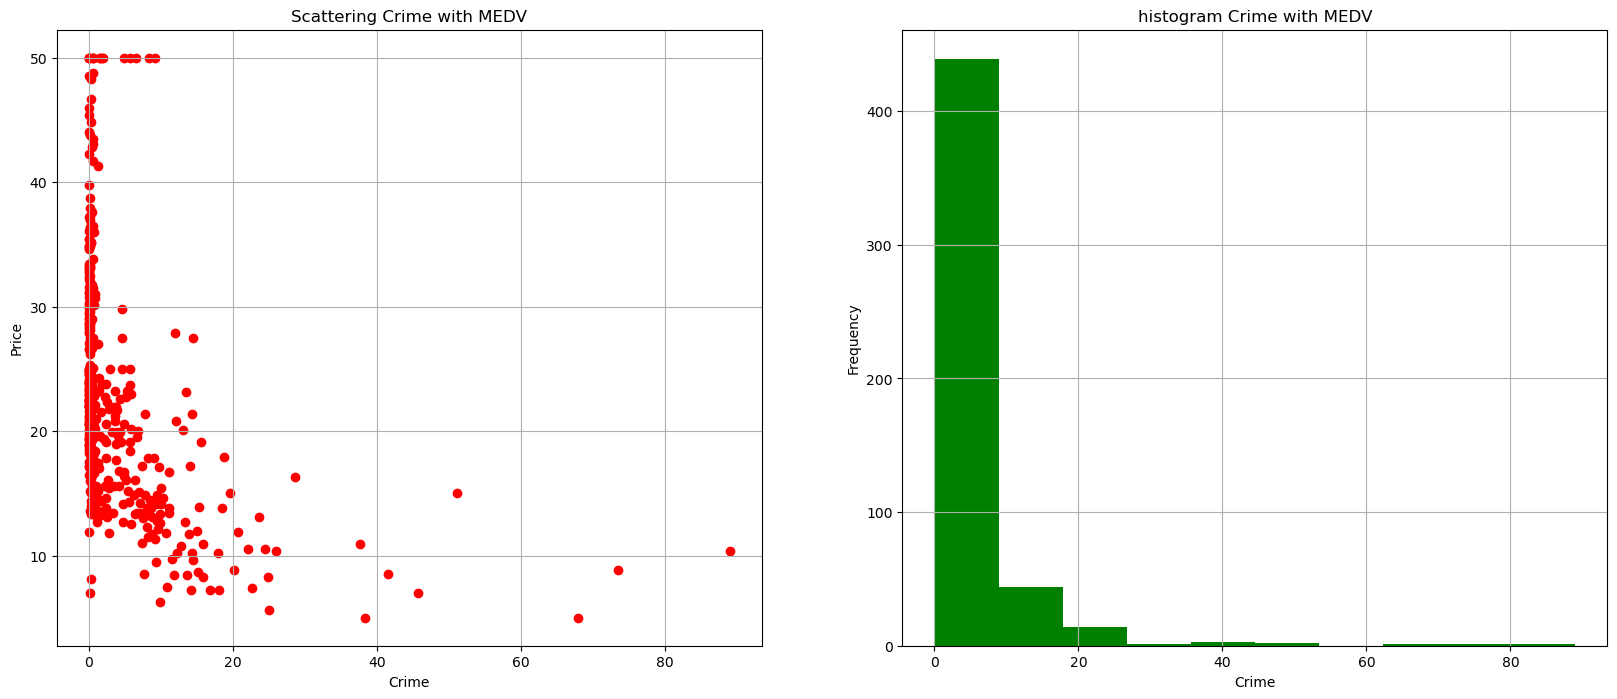

In [4]:
#Plotting of crime with medv 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0].scatter(df['crim'],df['medv'],marker='o',color='red')
ax[0].grid()
ax[0].set_xlabel("Crime")
ax[0].set_ylabel('Price')
ax[0].set_title("Scattering Crime with MEDV")

#histogram plotting 
ax[1].hist(df['crim'],color='green')
ax[1].grid()
ax[1].set_xlabel("Crime")
ax[1].set_ylabel('Frequency')
ax[1].set_title("histogram Crime with MEDV")
plt.show()


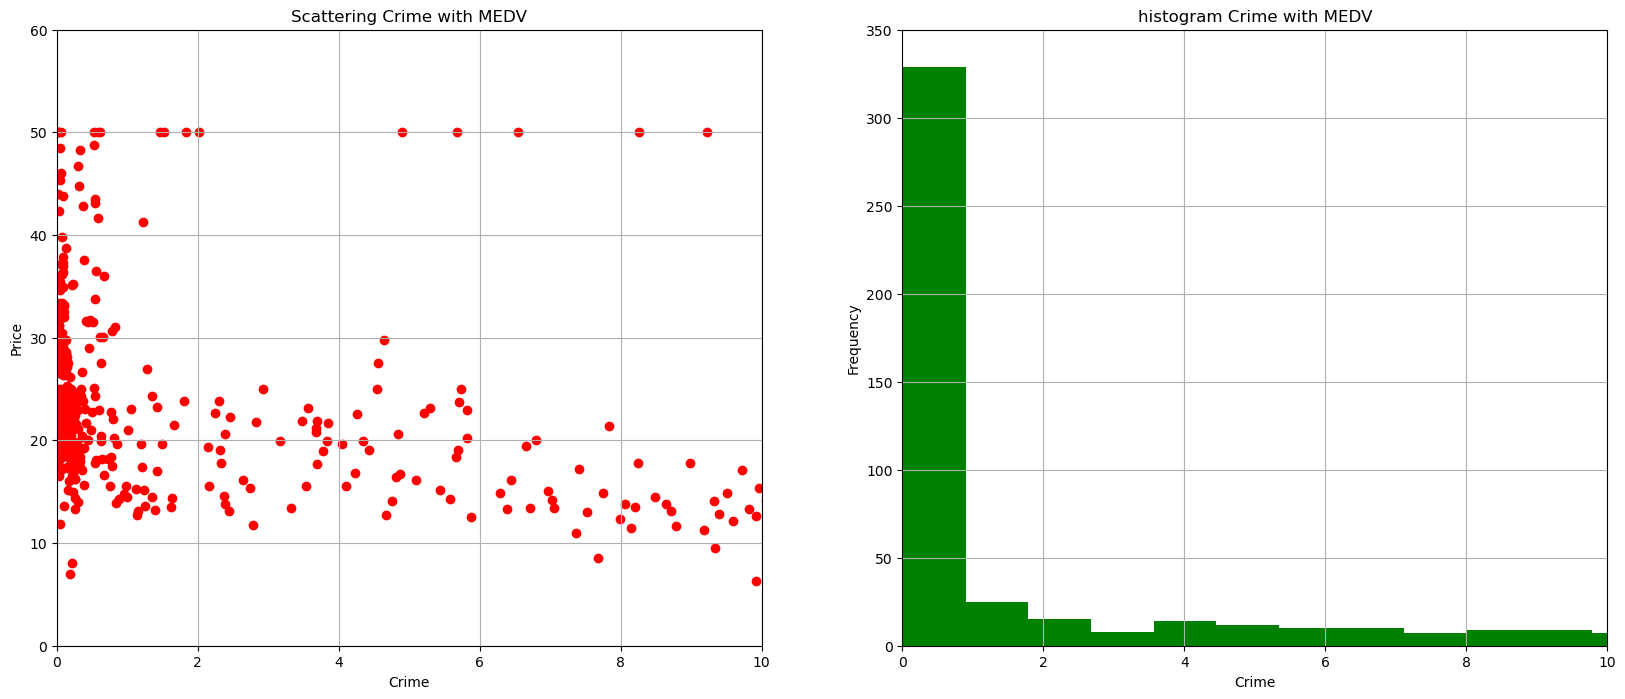

In [6]:
#Zooming the range between (0 to 10) 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0].scatter(df['crim'],df['medv'],marker='o',color='red')
ax[0].grid()
ax[0].set_xlabel("Crime")
ax[0].set_ylabel('Price')
ax[0].set_title("Scattering Crime with MEDV")
ax[0].axis([0,10,0,60])

#histogram plotting 
ax[1].hist(df['crim'],color='green',bins=100)
ax[1].grid()
ax[1].set_xlabel("Crime")
ax[1].set_ylabel('Frequency')
ax[1].set_title("histogram Crime with MEDV")
ax[1].axis([0,10,0,350])
plt.show()


In [7]:
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


In [8]:
df['zn'].value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64

In [9]:
df['medv'].mean()

22.532806324110677

In [10]:
df[df['zn']==0]['medv'].mean()

20.473387096774193

In [11]:
df[df['zn']!=0]['medv'].mean()

28.25

In [12]:
import warnings
warnings.filterwarnings('ignore')
values=['zero','non-zero']
frequencies=[df[df['zn']==0]['medv'].mean(),df[df['zn']!=0]['medv'].mean()]
sns.barplot(values,frequencies)
plt.xlabel("Zn")
plt.ylabel('MEAN of MEDV')
plt.title("Bar Graph analysis of ZN")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
#plotting of the indus data 
plt.scatter(df['indus'],df['medv'])
plt.xlabel("Indus")
plt.ylabel("medv")
plt.show()

In [ ]:
df.head(1)

In [ ]:
df['chas'].value_counts()

In [ ]:
values=['zero','one']
frequencies=[df[df['chas']==0].shape[0],
            df[df['chas']==1].shape[0]]
plt.pie(frequencies,labels=values,colors=['pink','gray'],
       counterclock=False,autopct='%.2f%%',shadow=True,explode=[0,0.2])
plt.title("Pie chart analysis of Chas")

plt.show()

In [ ]:
sns.barplot(values,frequencies)

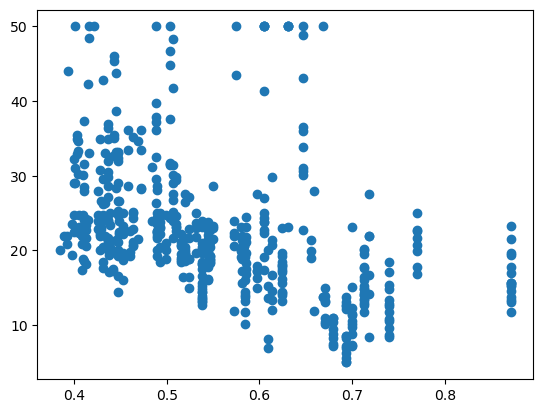

In [13]:
plt.scatter(df['nox'],df['medv'])

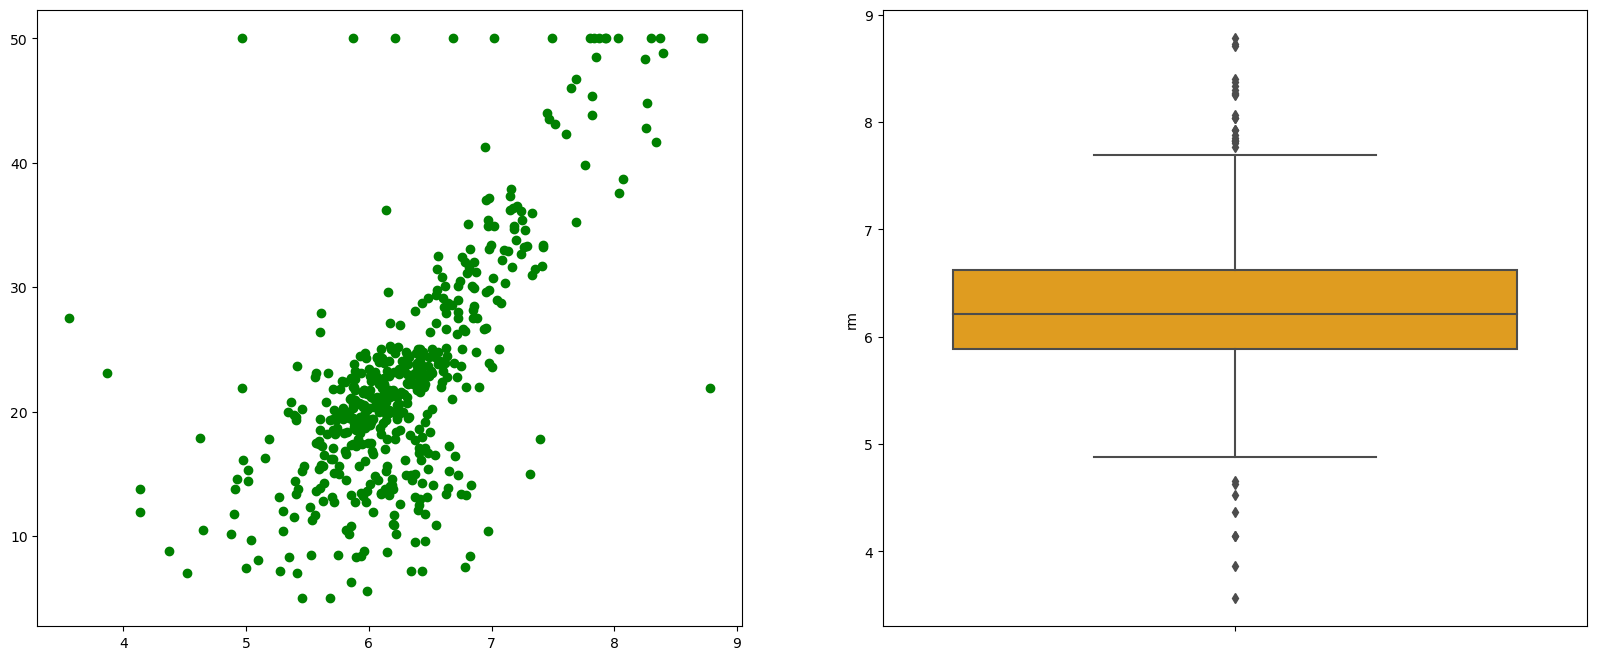

In [14]:
#room and medv
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.scatter(df['rm'],df['medv'],color='green')
fig.add_subplot(1,2,2)
sns.boxplot(y=df['rm'],color='orange')
plt.show()

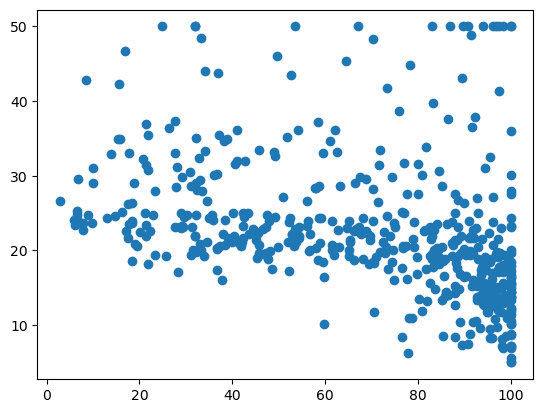

In [15]:
plt.scatter(df['age'],df['medv'])

<Axes: ylabel='b'>

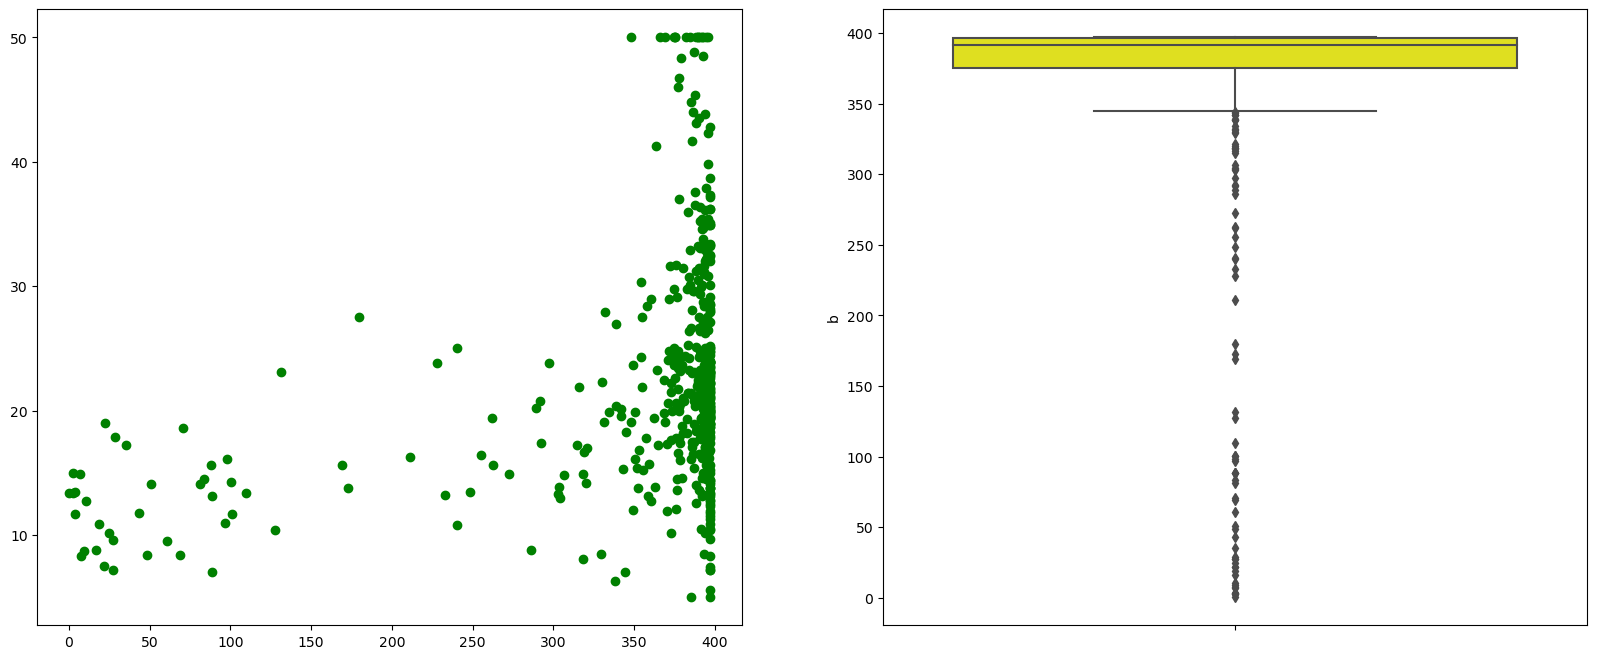

In [16]:
#plotting of B 
fig=plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.scatter(df['b'],df['medv'],color='green')
fig.add_subplot(1,2,2)
sns.boxplot(y=df['b'],color='yellow')

In [17]:
#checking of the outliears 
for k,v in df.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    irq=q3-q1
    v_col=v[(v<=q1-1.5*irq)|(v>=q3+1.5*irq)]
    perc=np.shape(v_col)[0]*100.0/np.shape(df)[0]
    print("Columns %s outliers=%.2f%%"%(k,perc))

Columns crim outliers=13.04%
Columns zn outliers=13.44%
Columns indus outliers=0.00%
Columns chas outliers=100.00%
Columns nox outliers=0.00%
Columns rm outliers=5.93%
Columns age outliers=0.00%
Columns dis outliers=0.99%
Columns rad outliers=0.00%
Columns tax outliers=0.00%
Columns ptratio outliers=2.96%
Columns b outliers=15.22%
Columns lstat outliers=1.38%
Columns medv outliers=7.91%


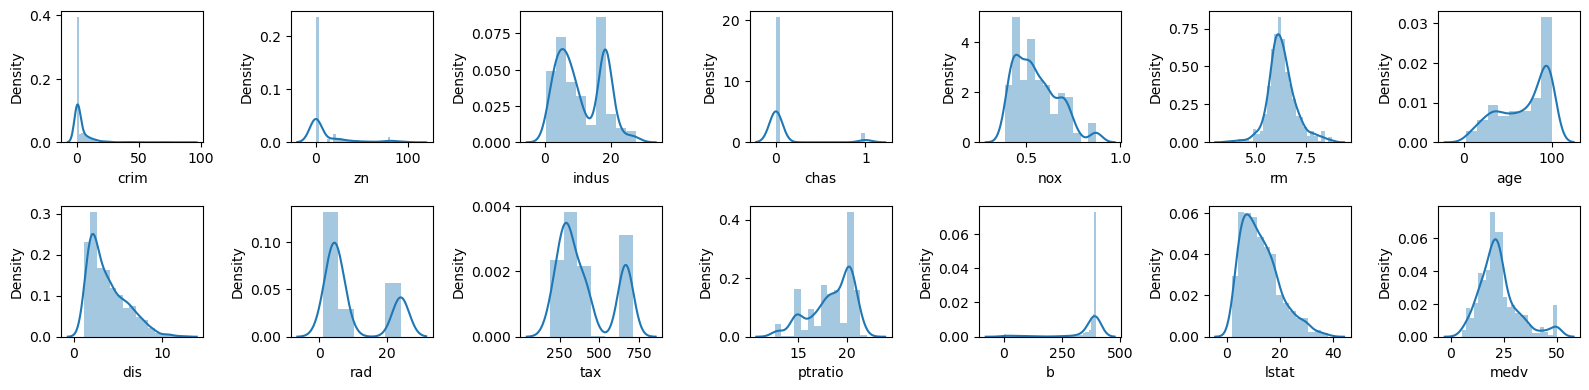

In [18]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [19]:
cormat=df.corr()
cormat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

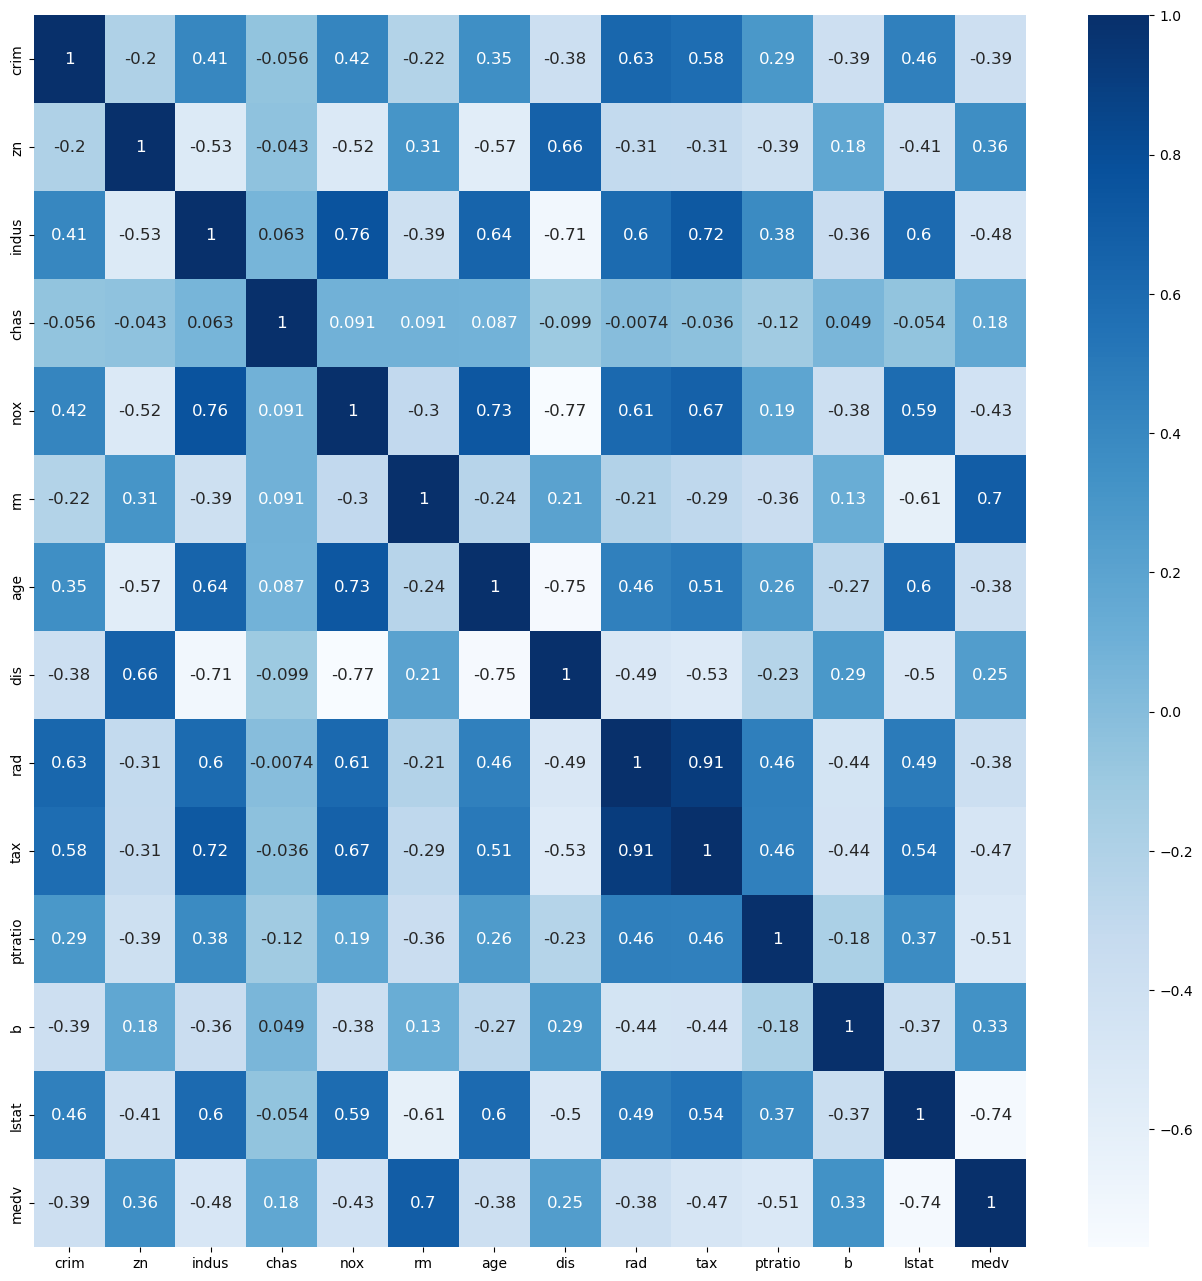

In [20]:
fig=plt.figure(figsize=(16,16))
fig.add_subplot(1,1,1)
sns.heatmap(df.corr(),annot=True,annot_kws={'size':12},cmap='Blues')

In [21]:
def getcorrelatedfeature(corrdata,threshold):
    feature=[]
    value=[]
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr_value'])
    return df

In [22]:
threshold=0.50
corr_value=getcorrelatedfeature(cormat['medv'],threshold)
corr_value

,corr_value
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
medv,1.000000


In [23]:
correlated_data=df[corr_value.index]
correlated_data.head(5)

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


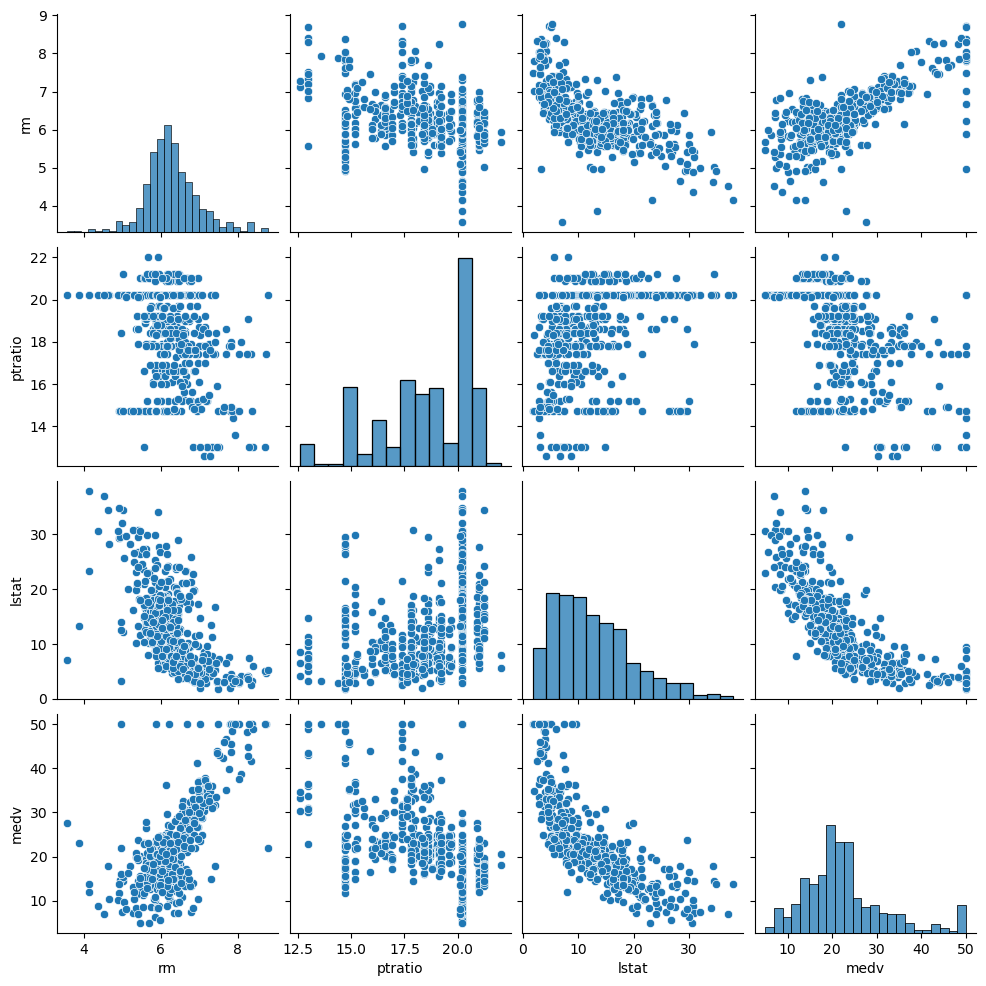

In [24]:
sns.pairplot(correlated_data)
plt.show()

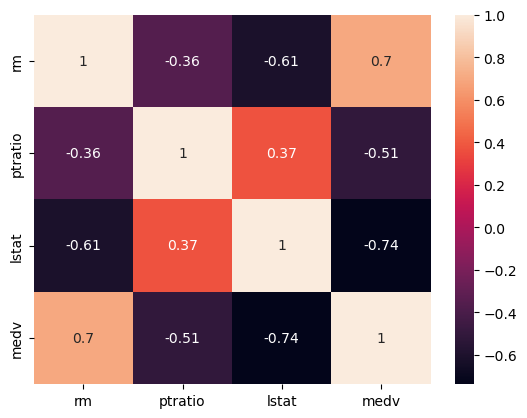

In [25]:
sns.heatmap(correlated_data.corr(),annot=True)
plt.show()

In [26]:
#using of the scikitlearn package 
x=correlated_data.drop(['medv'],axis=1)
y=correlated_data


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

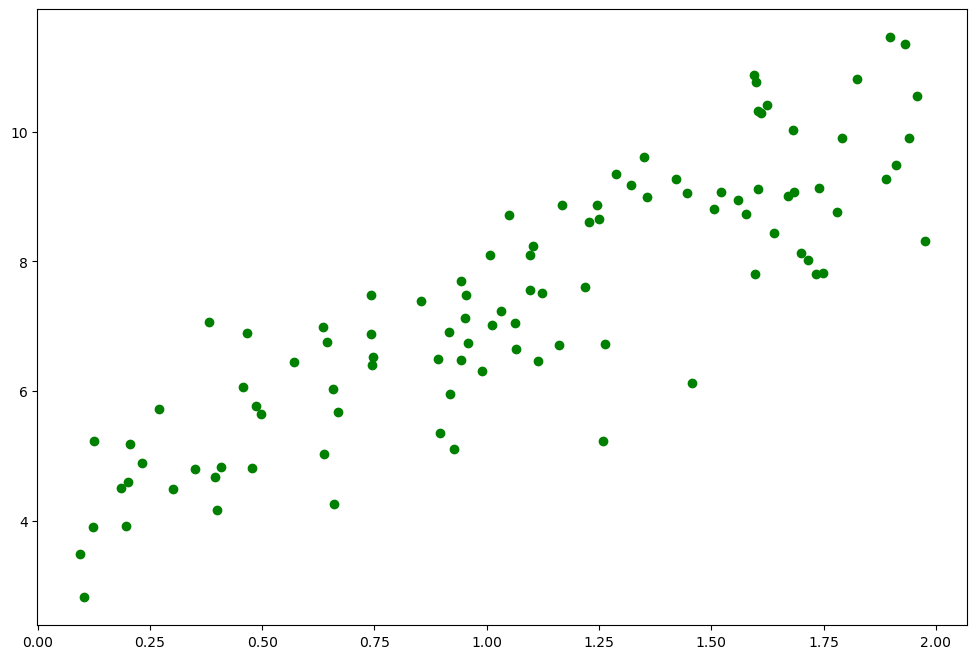

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,marker='o',color='green')
plt.show()

In [30]:
x_b=np.c_[np.ones((100,1)),x]
x_b

array([[1.        , 1.78049673],
       [1.        , 1.88851681],
       [1.        , 1.34911717],
       [1.        , 0.40884515],
       [1.        , 1.35692243],
       [1.        , 1.89893489],
       [1.        , 1.64013589],
       [1.        , 1.4460964 ],
       [1.        , 0.47769947],
       [1.        , 0.18653797],
       [1.        , 1.04938832],
       [1.        , 1.45806936],
       [1.        , 0.30216553],
       [1.        , 1.62465148],
       [1.        , 0.95085134],
       [1.        , 0.12239604],
       [1.        , 0.35050032],
       [1.        , 1.97626875],
       [1.        , 1.21806461],
       [1.        , 0.63670925],
       [1.        , 0.46705724],
       [1.        , 1.60433778],
       [1.        , 1.42065702],
       [1.        , 1.00712689],
       [1.        , 1.7403782 ],
       [1.        , 1.32152159],
       [1.        , 1.59850095],
       [1.        , 0.95345529],
       [1.        , 1.93058335],
       [1.        , 1.25059466],
       [1.

In [31]:
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [32]:
theta_best

array([[3.97649655],
       [3.16644535]])

In [33]:
X_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),X_new]

In [34]:
y_predict=x_new_b.dot(theta_best)

In [35]:
y_predict

array([[ 3.97649655],
       [10.30938726]])

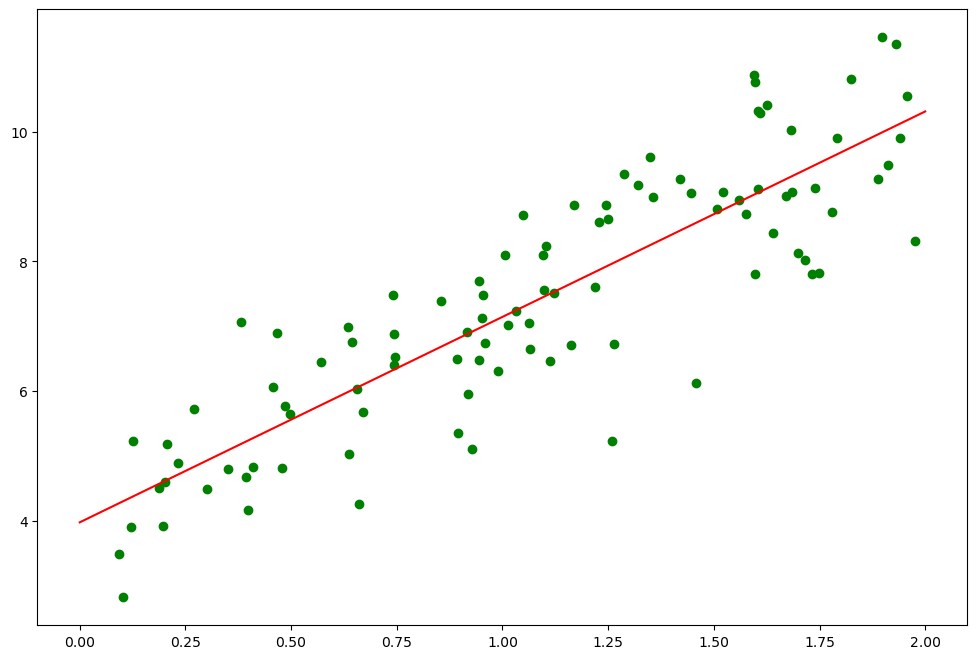

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,marker='o',color='green')
plt.plot(X_new,y_predict,'r-')
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [39]:
lin_reg.intercept_,lin_reg.coef_

(array([3.97649655]), array([[3.16644535]]))

In [40]:
correlated_data.head(5)

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x=correlated_data.drop('medv',axis=1)
y=correlated_data['medv']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 3), (102, 3), (404,), (102,))

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model=LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=model.predict(x_test)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
score=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Score is ",score)
print("Mean square error is ",mse)
print("Mean absolute error is ",mae)
print("Root mean square is ",rmse)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)     # It fix the random value
x=np.random.rand(100,1)

In [ ]:
x

In [ ]:
import pickle

In [ ]:
with open('b_model','wb')as f:
    pickle.dump(model,f)

In [ ]:
from flask import Flask,request,render_template
import joblib

In [ ]:
app=Flask(__name__)
model=joblib.load('b_model')


@app.route('/')
def func(name=None):
    return render_template('index.html',name=name)

@app.route('/result',methods=['GET','POST'])
def get_value():
    if request.method=='POST':
        rm=float(request.form.get('rm'))
        pt=float(request.form.get('pt'))
        lstat=float(request.form.get('lstat'))
        predict_value=model.predict([[rm,pt,lstat]])
    return render_template('results.html',prediction=predict_value)

In [ ]:
if __name__=="__main__":
    app.run()